# Autoencoders in pytorch Modified

Create a model that recieves and image and reconstruct 180deg flipped version of that image

In [94]:
# Import Libraries
import torch 
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [95]:
# Load mnist dataset
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=32, shuffle=True)


In [96]:
dataiter = iter(data_loader)
images, labels = next(dataiter)

In [97]:
images.shape

torch.Size([32, 1, 28, 28])

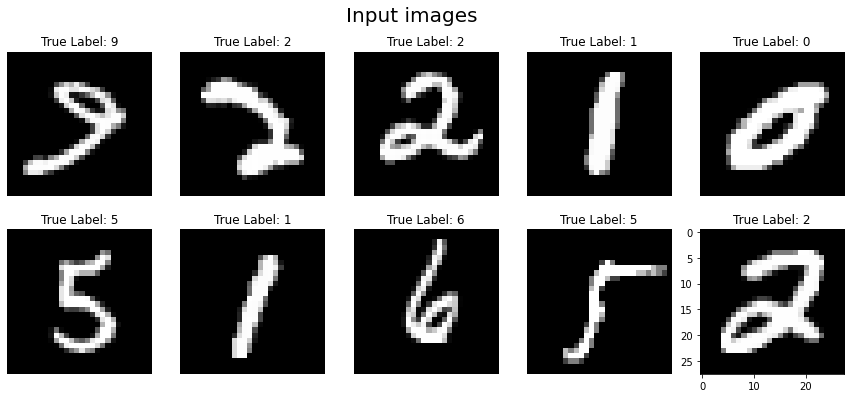

In [98]:
# Image visualization
height, width = (2, 5)

plt.figure(figsize=(width*3, height*3))
plt.suptitle("Input images", fontsize=20)

for i in range(1, height * width + 1):
  image = images[i]
  label = labels[i]

  plt.axis(False)
  plt.subplot(height, width, i)
  plt.title(f"True Label: {label}")
  plt.imshow(image.reshape(28, 28), cmap='gray')


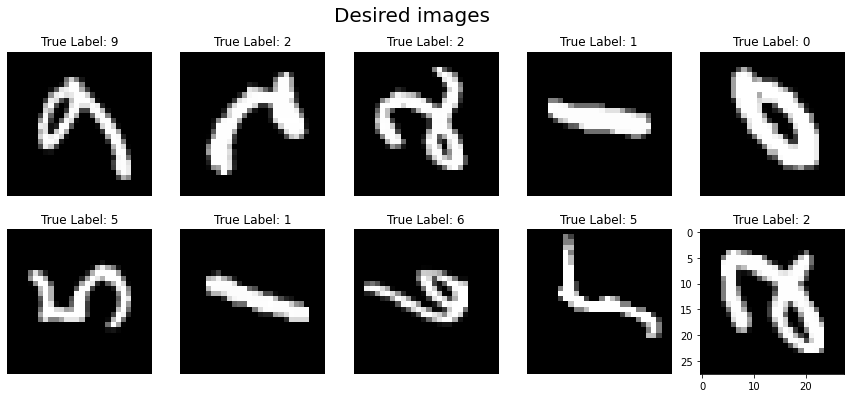

In [99]:
# Desired outptuts
images = torch.rot90(images, dims=[2, 3]) # Rotate images 90deg

plt.figure(figsize=(width*3, height*3))
plt.suptitle("Desired images", fontsize=20)

for i in range(1, height * width + 1):
  image = images[i]
  label = labels[i]

  plt.axis(False)
  plt.subplot(height, width, i)
  plt.title(f"True Label: {label}")
  plt.imshow(image.reshape(28, 28), cmap='gray')


In [100]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    # Input: N, 28, 28, 1
    # nn.Conv2d(in_channels, out_channels, kernal_size, stride)

    self.encoder = nn.Sequential(
        nn.Conv2d(1, 16, 3, stride=2), # N, 14, 14, 16
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, stride=2), # N, 7, 7, 32
        nn.ReLU(),
        nn.Conv2d(32, 64, 5) # N, 3, 3, 64
    )
    
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64, 32, 5), # N, 7, 7, 32
        nn.ReLU(), 
        nn.ConvTranspose2d(32, 16, 3, stride=2), # N, 14, 14, 16
        nn.ReLU(), 
        nn.ConvTranspose2d(16, 1, 3, stride=2, output_padding=1), # N, 28, 28, 1
        nn.Sigmoid() 
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [107]:
# Training parameters
EPOCHS = 10 
BATCH_SIZE = 32
LEARNING_RATE = 1e-3

SAVE_MODEL = False
VERSION = 1


In [102]:
# Check for gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Setting compute device to {device}")

Setting compute device to cuda


In [103]:
# Make instance of the model on cuda
model = Autoencoder().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [104]:
# Training loop 

outputs = []
for epoch in range(EPOCHS):
    for (img, _) in data_loader:
        # img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        img = img.to(device) # Send batch images to compute device
        recon = model(img) # Recon = reconstructed image
        mod_img = torch.rot90(img, dims=[2, 3])
        loss = criterion(recon, mod_img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0129
Epoch:2, Loss:0.0056
Epoch:3, Loss:0.0043
Epoch:4, Loss:0.0034
Epoch:5, Loss:0.0026
Epoch:6, Loss:0.0027
Epoch:7, Loss:0.0022
Epoch:8, Loss:0.0022
Epoch:9, Loss:0.0022
Epoch:10, Loss:0.0021


In [108]:
if SAVE_MODEL:
    torch.save(model, f'./modified_nmist_model_v{VERSION}')

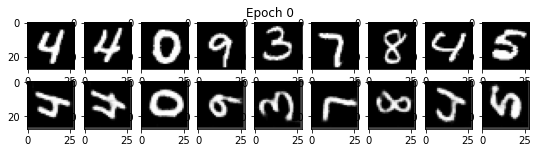

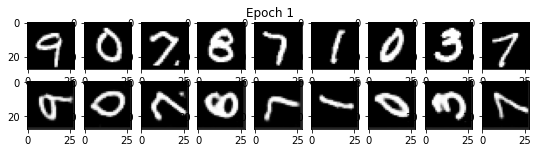

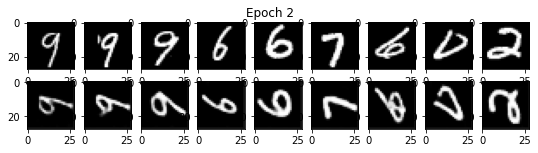

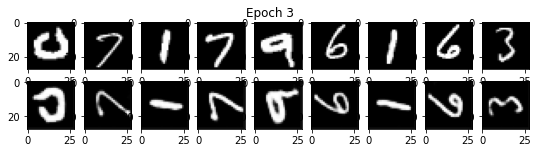

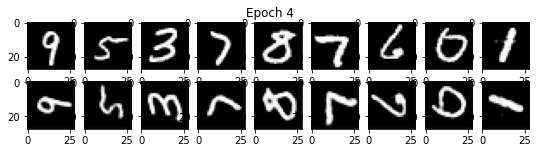

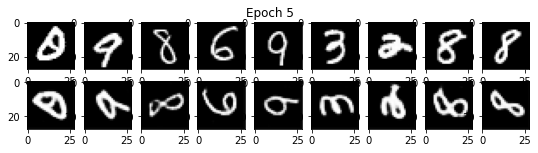

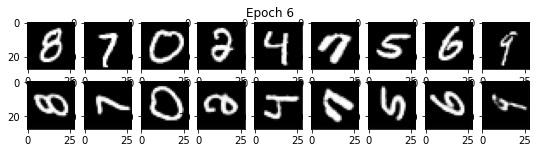

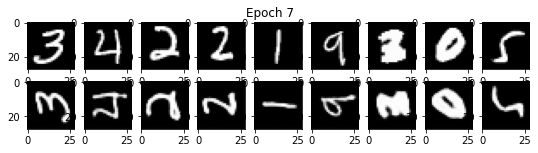

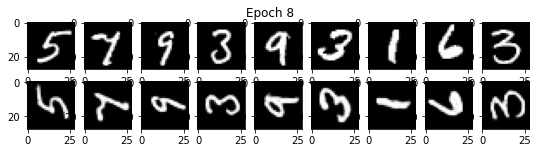

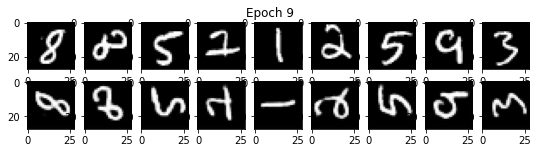

In [106]:
# Learning over epochs
for k in range(0, EPOCHS, 1):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].cpu().detach().numpy()
    recon = outputs[k][2].cpu().detach().numpy()
    plt.suptitle(f"Epoch {k}")
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])


This Autoencoder model takes image and reconstruct the image again flipped 90degs. 